**Sales prediction using python**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
df = pd.read_csv("Advertising.csv")
df.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [9]:
df.shape

(200, 5)

In [10]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [11]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [13]:
df.describe()

Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

In [14]:
data = df.copy()
data.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

<Axes: >

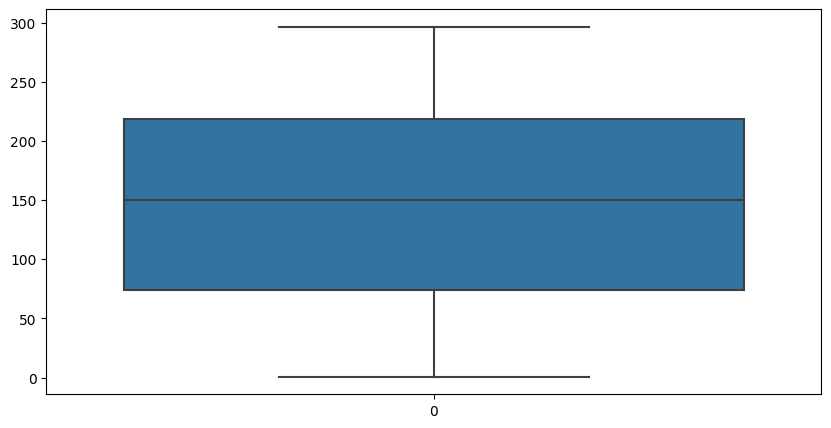

In [15]:
plt.figure(figsize = (10,5))

sns.boxplot(data['TV'])

<Axes: >

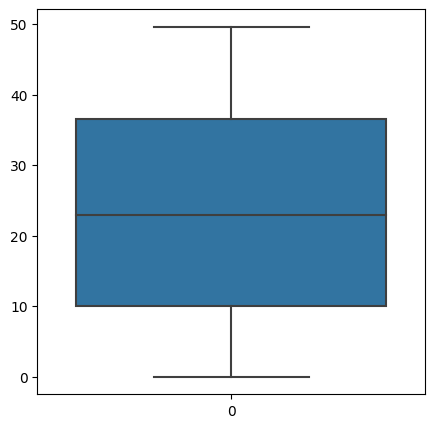

In [16]:
plt.figure(figsize = (5,5))
sns.boxplot(data['Radio'])

<Axes: >

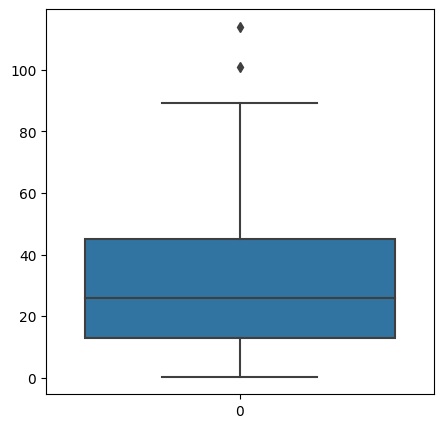

In [17]:
plt.figure(figsize = (5,5))


sns.boxplot(data['Newspaper'])

<Axes: >

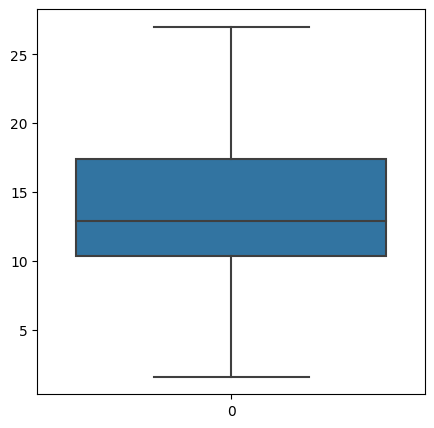

In [18]:
plt.figure(figsize  = (5,5))
sns.boxplot(data['Sales'])

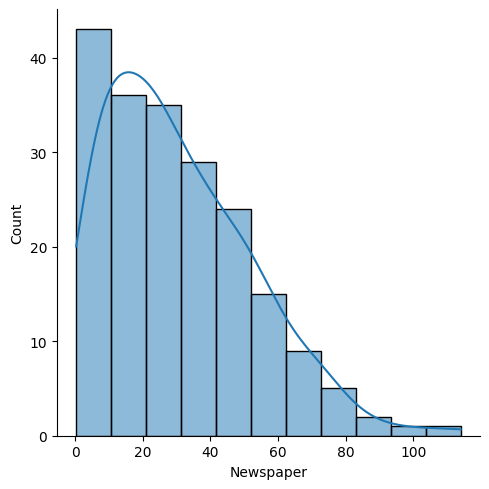

In [19]:
sns.displot(df['Newspaper'],kde = True)

<Figure size 500x500 with 0 Axes>

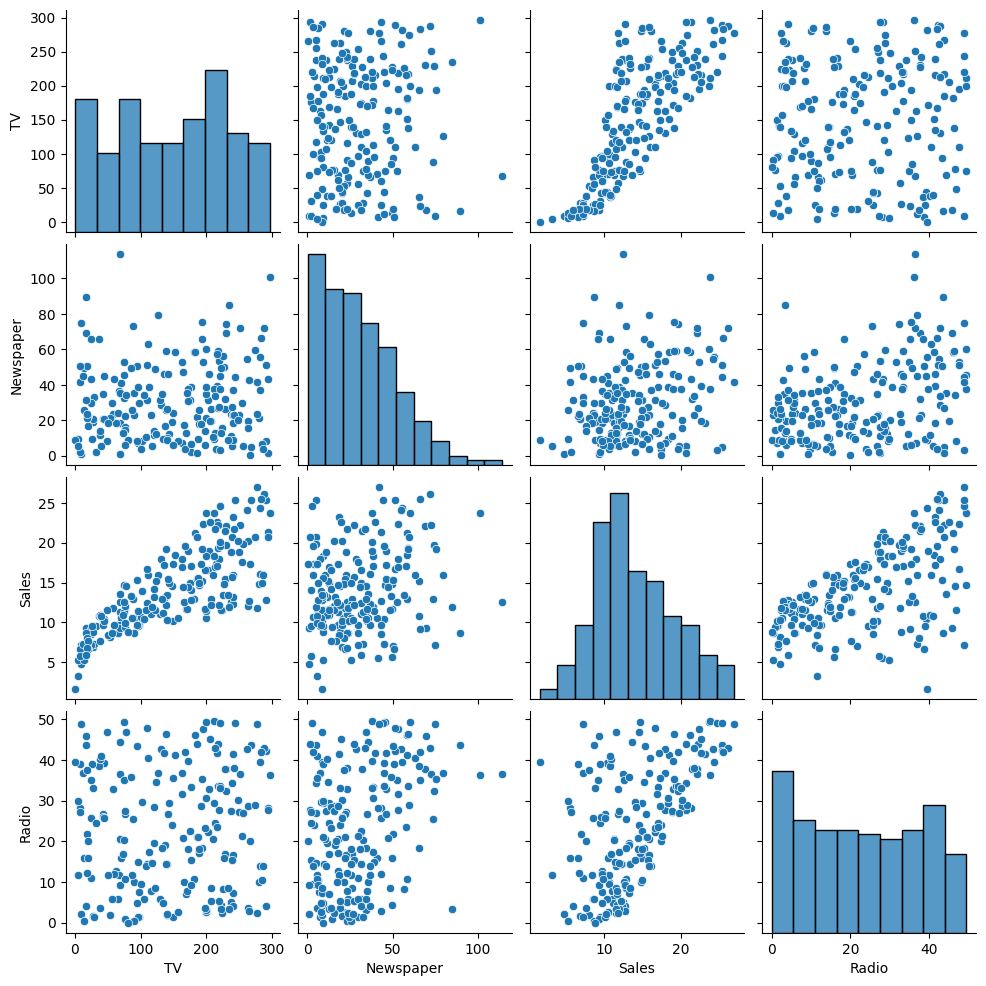

In [20]:
plt.figure(figsize = (5,5))
sns.pairplot(data[['TV','Newspaper','Sales','Radio']],kind = 'scatter')

In [22]:
x = data['TV']
y = data['Sales']
x = x.values.reshape(-1,1)

x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [23]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [24]:
print(x.shape,y.shape)

(200, 1) (200,)


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.33)

In [26]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [27]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score ,GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [28]:
KNN_reg = KNeighborsRegressor().fit(x_train,y_train)
KNN_reg

KNeighborsRegressor()

In [29]:
KNN_reg_train_pred = KNN_reg.predict(x_train)

In [30]:
KNN_reg_test_pred =  KNN_reg.predict(x_test)

In [31]:
print(KNN_reg_train_pred,KNN_reg_test_pred)

[ 8.66 13.92 19.74 18.12 15.82 12.34 14.66 10.58 19.1  17.68  8.66 15.14
 18.44 18.9  16.06  5.96 15.14 16.06 17.   16.76 15.94 13.96 14.7  10.58
 15.9  18.9  19.4  20.54 19.64  5.26 19.1   7.24 18.54  9.72  7.96 16.52
 20.46 16.52 14.58 14.86 10.16 17.1  15.18 16.52 15.64 18.44 18.9  11.42
 13.1  18.9  14.42 10.76 17.18 18.54  9.78 19.9   5.96  5.96 10.7   7.96
 18.16 14.1  11.42 14.66  8.66 20.46  4.44 18.54 19.16 19.54 15.82  4.44
 20.18 11.42 13.92 13.52 16.76 16.06 17.54 17.52 15.14  5.96 14.42 18.12
  6.44 20.46 11.42  8.52 10.86 20.18 19.74 13.26  5.96 16.06 12.34 18.9
 13.52 13.52 18.44 10.38 14.08 13.1  17.54 10.58 11.32 20.86 13.52 18.44
  9.78 11.88 13.1  18.16  7.24 16.06  6.44 20.86 12.34 11.32 11.42  8.66
  9.78 18.44 14.82 11.32 17.5  12.34 15.14 12.9  19.9  12.9  15.64  9.78
 19.4  10.7 ] [18.12 13.92 11.32 17.68 18.9  13.88 13.42 20.46 20.46  5.72 10.34 11.42
 20.34 18.16 18.44 14.82  9.72 20.34 14.08 10.64  9.78 11.42 16.76 11.88
 11.16  7.24  7.96 17.5  15.64 11.42 2

In [32]:
Results = pd.DataFrame(columns = ["Model","Train R2","Test R2","Test RMSE","Variance"])

In [33]:
r2 = r2_score(y_test,KNN_reg_test_pred)
r2_train_score = r2_score(y_train,KNN_reg_train_pred)
mean_squraed = np.sqrt(mean_squared_error(y_test,KNN_reg_test_pred))
variance = r2_train_score - r2
Results  = Results.append({"Model":"K-Nearest-Neighbors","Train R2":r2_train_score,"Test R2":r2,"Test mean_squraed":mean_squraed,"variance":variance},ignore_index = True)
print("R2:",r2)
print("Mean_squared",mean_squraed)

R2: 0.5437837039440612
Mean_squared 3.2872941806755036


<ipython-input-33-ba621713f8d8>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results  = Results.append({"Model":"K-Nearest-Neighbors","Train R2":r2_train_score,"Test R2":r2,"Test mean_squraed":mean_squraed,"variance":variance},ignore_index = True)


In [34]:
Results.head()

Model  Train R2   Test R2 Test RMSE Variance  \
0  K-Nearest-Neighbors  0.663447  0.543784       NaN      NaN   

   Test mean_squraed  variance  
0           3.287294  0.119663

In [35]:
import statsmodels.api as stat
x_constanttrain = stat.add_constant(x_train)
model_fit = stat.OLS(y_train,x_constanttrain).fit()
model_fit.params

const    6.719305
x1       0.049735
dtype: float64

In [36]:
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     204.9
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           1.23e-28
Time:                        14:27:13   Log-Likelihood:                -351.94
No. Observations:                 134   AIC:                             707.9
Df Residuals:                     132   BIC:                             713.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7193      0.603     11.138      0.0

In [37]:
y_train_pred = model_fit.predict (x_constanttrain)
Result = (y_train - y_train_pred)
Result

44     0.532349
157   -4.069592
93     3.002210
113   -1.243739
100   -6.080346
         ...   
26     1.173579
45    -0.527885
144   -0.103802
74    -0.332732
107   -2.515339
Name: Sales, Length: 134, dtype: float64

In [38]:
y_train_pred

array([ 7.96765051, 14.16959218, 19.19779028, 17.14373903, 17.78034572,
       13.69711066, 13.15500028,  8.9424545 , 17.43220144, 17.50183029,
        8.14172265, 16.62152261, 18.13346349, 19.78466207, 18.66065339,
        7.1519982 , 16.61157563, 18.65070642, 15.23889247, 16.06449176,
       17.67590243, 16.8701971 , 17.94944437,  8.85790517, 15.711374  ,
       19.90899931, 17.33770513, 19.42159732, 17.58637962,  6.98787304,
       17.39738701,  7.60955925, 16.54692027,  8.5545223 ,  7.64934717,
       14.90069517, 21.28665596, 14.95540356, 17.85992155, 12.97098116,
        9.12150013, 16.22364344, 16.79062126, 15.01508544, 15.29857435,
       18.26277422, 19.71503321, 10.45439537, 12.69743923, 19.79460905,
       15.52238139, 10.98158528, 15.80089681, 16.54692027, 11.56845706,
       18.81483158,  7.14702471,  7.13707773, 11.05618762,  7.6841616 ,
       18.52636917, 14.50778948, 10.46434235, 13.23954961,  8.05219984,
       21.02306101,  6.92321767, 16.43750349, 17.20342091, 20.33

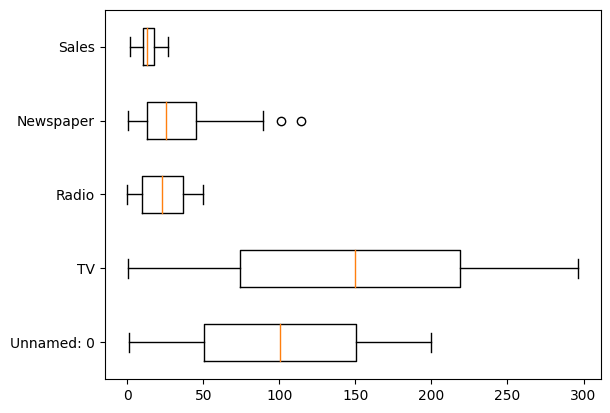

In [45]:
plt.boxplot(df,vert=False,data=df,labels=df.columns)
plt.show()

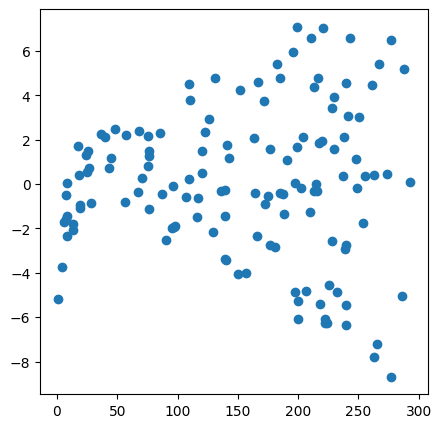

In [39]:
plt.figure(figsize = (5,5))
plt.scatter(x_train,Result)
plt.show()

In [40]:
x_constant = stat.add_constant(x_test)
y_pred = model_fit.predict(x_constant)
y_pred

array([17.19844742, 14.16461869, 10.12117156, 17.48193633, 19.92889327,
       14.04525494, 13.44346269, 21.12750429, 21.4607281 ,  7.30120289,
       11.82707853, 10.43450141, 20.65502277, 18.38213797, 18.01907322,
       14.85096027,  8.60923069, 20.67989022, 12.73722715,  9.81778869,
       11.38941143, 10.00678129, 16.08935921, 13.57774691, 10.36984604,
        7.57474482,  7.65432066, 17.00945481, 15.45772602, 10.70804334,
       20.82412142,  8.86287866, 17.58140613, 16.32808672, 10.1510125 ,
        7.55982436, 17.68584941, 10.47428933,  7.69410858,  8.93250752,
       20.71470465, 11.92157483, 13.39870128, 10.60857355, 10.16095948,
        8.61917766, 12.33437448,  8.08701427, 15.09466127, 11.18052487,
       11.4043319 ,  9.38012159, 21.17723919,  8.28595385,  9.20604945,
       11.71268827, 21.32147039, 18.52636917, 20.85893585, 16.35295417,
       11.11089601, 13.26939055, 16.91495851,  7.96267702,  9.68350446,
       15.18418409])

In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2  = r2_score(y_test,y_pred)
r2

0.6095847023419757

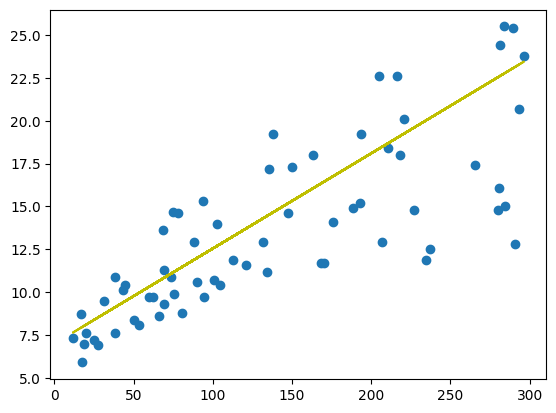

In [42]:
plt.scatter(x_test,y_test)
plt.plot(x_test,7 + 0.0555*x_test,'y')
plt.show()